# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
file_path = 'data/airbnbListingsData.csv'

df = pd.read_csv(file_path)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2           Spacious Brooklyn Duplex, Patio + Garden   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview    host_name  \
0  Centrally located in the heart of Manhattan ju...     Jennifer   
1  Just the right mix of urban center and local n...  LisaRoxanne   
2                                                NaN      Rebecca   
3    Theater district, many restaurants around her

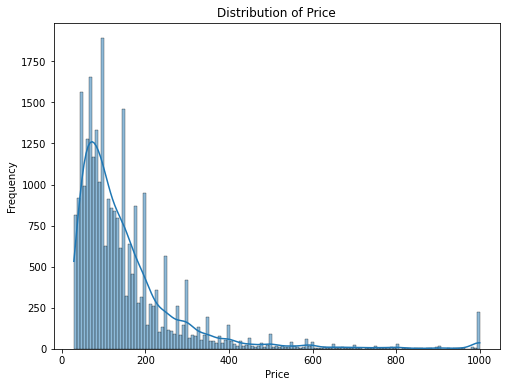

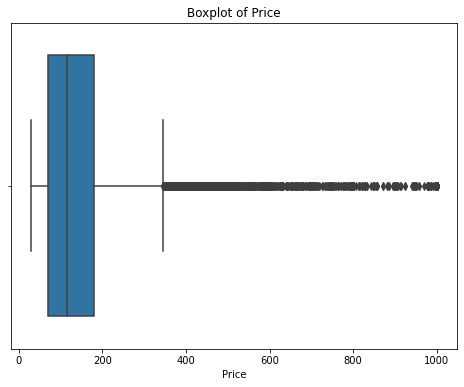

In [4]:
# YOUR CODE HERE

#Print rows and check for missing values
print(df.head())

print(df.isnull().sum())

#Analyze the data set through a graph

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde = True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

#Check for outliers, which will help us see any errors or inconsistency
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['price'])
plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.show()


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [ ]:
# YOUR CODE HERE


#Data Splitting

# Define features (X) and target variable (y), labels
X = df.drop('price', axis = 1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)





#Data Preparation and Feature Engineering(1)

# Handle missing values (Example: Fill missing numerical values with mean)
X_train = X_train.copy()
X_train.fillna(X_train.mean(), inplace=True)

X_test = X_test.copy()
X_test.fillna(X_test.mean(), inplace=True)



#Train data(2)

#initialize the model, then fit the model

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
model = RandomForestRegressor(random_state = 42)
model.fit(X_train_encoded, y_train)

# Predict the testing data(3)
y_pred = model.predict(X_test_encoded)

# Evaluate the model 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


#Model Improvement(4)

#  hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, scoring = 'neg_mean_squared_error')

#fit the grid search
grid_search.fit(X_train_encoded, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the testing data using the best model
y_pred_best = best_model.predict(X_test_encoded)

# Evaluate the best model using mean squared error
mse_best = mean_squared_error(y_test, y_pred_best)

print("Best Model Mean Squared Error:", mse_best)

